In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
train=pd.read_csv(r'C:\Users\USER\DS PROJECT\NSE-RELIANCE.csv')
train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,1097.40,1104.45,1081.1,1099.60,1098.65,8465141.0,92529.47
1,2019-01-03,1107.50,1114.60,1090.1,1090.30,1092.75,7446457.0,82012.92
2,2019-01-02,1114.50,1127.00,1101.0,1104.35,1106.40,7144970.0,79553.42
3,2019-01-01,1125.25,1127.30,1110.1,1120.50,1121.00,4455850.0,49861.29
4,2018-12-31,1130.95,1133.85,1116.2,1125.25,1121.25,7222817.0,81060.63


In [3]:
train=train.fillna(method='ffill')
train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,1097.40,1104.45,1081.1,1099.60,1098.65,8465141.0,92529.47
1,2019-01-03,1107.50,1114.60,1090.1,1090.30,1092.75,7446457.0,82012.92
2,2019-01-02,1114.50,1127.00,1101.0,1104.35,1106.40,7144970.0,79553.42
3,2019-01-01,1125.25,1127.30,1110.1,1120.50,1121.00,4455850.0,49861.29
4,2018-12-31,1130.95,1133.85,1116.2,1125.25,1121.25,7222817.0,81060.63


In [4]:
from datetime import date
from dateutil.relativedelta import relativedelta
datee= pd.to_datetime(train['Date'][0]) 
y= datee.year
m= datee.month
d= datee.day
last_three_months = datetime.date(y,m,d)+ relativedelta(months=-3) 

In [5]:
d1=train['Date'][0]
d2=str(last_three_months)
length=0
for i in train['Date']:
    if i>=d2 and i<=d1:
        length+=1

print('total numbers of data in last 3 months:',length)

total numbers of data in last 3 months: 63


0     1098.65
1     1092.75
2     1106.40
3     1121.00
4     1121.25
       ...   
58    1102.10
59    1090.05
60    1109.40
61    1048.85
62    1122.25
Name: Close, Length: 63, dtype: float64


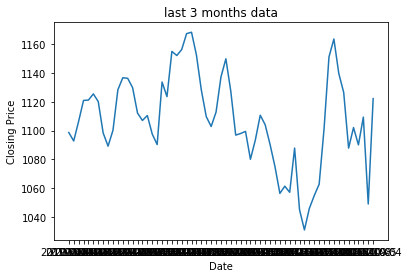



Closing price varies from  1098.65  to  1122.25


In [6]:
import matplotlib.pyplot as plt
print(train['Close'][0:length])
plt.title("last 3 months data")
plt.plot(train['Date'][0:length],train['Close'][0:length])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
print('\n\nClosing price varies from ',train['Close'][0],' to ',train['Close'][length-1])

In [7]:
import datetime
train['Date']= pd.to_datetime(train['Date']) 
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
train['weekday'] = train['Date'].dt.weekday
train['weekday_name'] = train['Date'].dt.day_name()
train.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),year,month,day,weekday,weekday_name
0,2019-01-04,1097.40,1104.45,1081.1,1099.60,1098.65,8465141.0,92529.47,2019,1,4,4,Friday
1,2019-01-03,1107.50,1114.60,1090.1,1090.30,1092.75,7446457.0,82012.92,2019,1,3,3,Thursday
2,2019-01-02,1114.50,1127.00,1101.0,1104.35,1106.40,7144970.0,79553.42,2019,1,2,2,Wednesday
3,2019-01-01,1125.25,1127.30,1110.1,1120.50,1121.00,4455850.0,49861.29,2019,1,1,1,Tuesday
4,2018-12-31,1130.95,1133.85,1116.2,1125.25,1121.25,7222817.0,81060.63,2018,12,31,0,Monday


In [8]:
new_df1=pd.DataFrame(train,columns=['day','month','year','weekday','weekday_name','Close'])
new_df1.tail()

,day,month,year,weekday,weekday_name,Close
5179,26,3,1998,3,Thursday,179.45
5180,25,3,1998,2,Wednesday,183.85
5181,24,3,1998,1,Tuesday,178.70
5182,23,3,1998,0,Monday,180.20
5183,20,3,1998,4,Friday,180.20


In [9]:
datee= pd.to_datetime(train['Date'][0]) 
yy= datee.year
m= datee.month
d= datee.day
last_two_months = datetime.date(yy,m,d)+ relativedelta(months=-2) 

In [10]:
d1=train['Date'][0]
d2=last_two_months
length=0
for i in train['Date']:
    if i>=d2 and i<=d1:
        length+=1

print('total numbers of data in last 2 months:',length)

total numbers of data in last 2 months: 42


In [11]:
new_df=new_df1[0:length]
new_df.tail()

,day,month,year,weekday,weekday_name,Close
37,12,11,2018,0,Monday,1080.00
38,9,11,2018,4,Friday,1093.45
39,7,11,2018,2,Wednesday,1110.70
40,6,11,2018,1,Tuesday,1104.10
41,5,11,2018,0,Monday,1090.30


In [12]:
x=new_df[['month','day','weekday']].values
y=new_df['Close'].values

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print(y_pred)

[1122.66419264 1124.84165008 1125.41821168 1129.6398938  1121.66611747
 1120.48673519 1127.88394992 1124.13185572 1127.30738833 1125.12993088
 1120.19845439 1121.08955588 1122.08763104 1106.38142598 1127.01910753
 1128.77505141 1121.37783667]


In [16]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()

,Actual,Predicted
0,1112.90,1122.664193
1,1099.45,1124.841650
2,1128.20,1125.418212
3,1121.25,1129.639894
4,1128.45,1121.666117


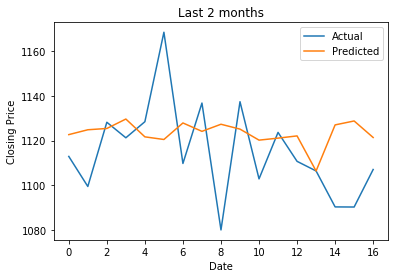

In [17]:
import matplotlib.pyplot as plt
df.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Last 2 months')
plt.show()

In [18]:
from sklearn import metrics
import numpy as np

In [81]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 23.667210948441905


In [82]:
user_in=input('Enter date in (DD MM YYYY) format:')

Enter date in (DD MM YYYY) format:04 01 2019


In [83]:
import re
import datetime
from datetime import date
match=re.search(r'\d{2} \d{2} \d{4}',user_in)
date=datetime.datetime.strptime(match.group(),'%d %m %Y').date()
yy,m,d=int(date.year),int(date.month),int(date.day)
day=datetime.datetime.strptime(user_in,'%d %m %Y').weekday()

feature_x=[]
feature_x_=[]
feature_x.append(m)
feature_x.append(d)
feature_x.append(day)
feature_x_.append(feature_x)
y_pred=reg.predict(feature_x_)
print("Predicted closing price:",y_pred)

Predicted closing price: [1101.44994949]
